In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

zsh:1: command not found: wget


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[['ram', 'storage', 'screen', 'final_price']]

<Axes: >

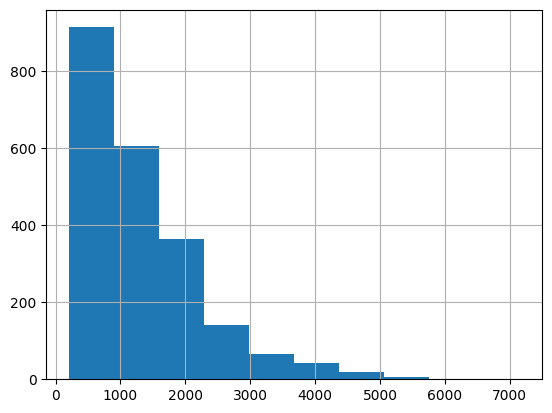

In [9]:
df['final_price'].hist()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


In [11]:
df['ram'].median()

16.0

In [13]:
df['screen'].value_counts()

screen
15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.50      19
13.40      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
12.00       4
18.00       3
14.50       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: count, dtype: int64

In [16]:
df.fillna(0, inplace=True)

/var/folders/p6/b16fkpd508j8307_nxc17wjc0000gn/T/ipykernel_35636/4231983114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [18]:
X = df[['ram', 'storage', 'screen']]
y = df['final_price']

# Assuming df is your filtered dataset
# Shuffle the dataset with a random seed of 42
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the features (X) and target (y)
X = df_shuffled[['ram', 'storage', 'screen']]
y = df_shuffled['final_price']

# First, split the data into 60% train and 40% temporary (to later split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then, split the 40% temporary into 20% validation and 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 1296
Validation set size: 432
Test set size: 432


In [20]:


# Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different values of r (regularization strength) for Ridge regression
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_r = None
best_rmse = float('inf')

for r in r_values:
    # Initialize and train the Ridge regression model
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Round the RMSE to 2 decimal places
    rmse_rounded = round(rmse, 2)
    
    print(f"RMSE for r={r}: {rmse_rounded}")
    
    # Update the best r if this RMSE is the lowest
    if rmse_rounded < best_rmse:
        best_rmse = rmse


RMSE for r=0: 675.08
RMSE for r=0.01: 675.08
RMSE for r=0.1: 675.08
RMSE for r=1: 675.08
RMSE for r=5: 675.08
RMSE for r=10: 675.08
RMSE for r=100: 675.01


In [22]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[['ram', 'storage', 'screen', 'final_price']]

In [23]:
df.fillna(0, inplace=True)

# Define the features (X) and target (y)
X = df[['ram', 'storage', 'screen']]
y = df['final_price']

# List of seeds to try
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# To store RMSE scores
rmse_scores = []

# Loop through each seed
for seed in seeds:
    # Shuffle and split the dataset with the current seed
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

    # Train a simple linear regression model (no regularization)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

# Calculate the standard deviation of the RMSE scores
std_rmse = np.std(rmse_scores)

# Round the result to 3 decimal places
std_rmse_rounded = round(std_rmse, 3)

# Print the standard deviation
print(f"Standard deviation of RMSE scores: {std_rmse_rounded}")


Standard deviation of RMSE scores: 35.825


In [25]:
seed = 9
r = 0.001

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=seed)

model = Ridge(alpha=r)
model.fit(X_train, y_train)
    
# Predict on the validation set
y_pred = model.predict(X_val)
    
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Round the RMSE to 2 decimal places
rmse_rounded = round(rmse, 2)


print(f"RMSE for r={r}: {rmse_rounded}")

RMSE for r=0.001: 612.86
